In [1]:
from google.colab import files
uploaded = files.upload()

Saving India_Recovered_Cases_21.csv to India_Recovered_Cases_21.csv


In [2]:
import pandas as pd
df = pd.read_csv("India_Recovered_Cases_21.csv")
df.head()

,Date,Recovered
0,1/1/21,9929568
1,1/2/21,9927310
2,1/3/21,9946867
3,1/4/21,9975958
4,1/5/21,9997272


In [4]:
Recovered_cases = df['Recovered']

In [5]:
data = df.filter(['Recovered'])

In [6]:
dataset = data.values

In [7]:
import math
training_data_len = math.ceil(len(dataset) * 0.7)
training_data_len

152

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [9]:
scaled_data

array([[1.07281466e-04],
       [0.00000000e+00],
       [9.29186726e-04],
       [2.31135020e-03],
       [3.32401502e-03],
       [4.25462710e-03],
       [5.23047033e-03],
       [5.23047033e-03],
       [7.06214220e-03],
       [7.86789347e-03],
       [8.74139646e-03],
       [9.58791279e-03],
       [1.04265897e-02],
       [1.11855894e-02],
       [1.19921959e-02],
       [1.28079722e-02],
       [1.34948491e-02],
       [1.43220757e-02],
       [1.51292048e-02],
       [1.60777763e-02],
       [1.69327972e-02],
       [1.77469581e-02],
       [1.85046750e-02],
       [1.91364859e-02],
       [1.98919697e-02],
       [2.05248259e-02],
       [2.12042910e-02],
       [2.21899692e-02],
       [2.28928576e-02],
       [2.35562637e-02],
       [2.41204179e-02],
       [2.47581677e-02],
       [2.54340219e-02],
       [2.62808709e-02],
       [2.70340742e-02],
       [2.77224240e-02],
       [2.82832998e-02],
       [2.88488794e-02],
       [2.95148037e-02],
       [3.01365895e-02],


In [10]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.00010728, 0.        , 0.00092919, 0.00231135, 0.00332402,
       0.00425463, 0.00523047, 0.00523047, 0.00706214, 0.00786789])]
[0.0087413964587994]



In [11]:
import numpy as np
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(142, 10, 1)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.recurrent import LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
142/142 [==============================] - 5s 11ms/step - loss: 0.0040
Epoch 2/50
142/142 [==============================] - 2s 11ms/step - loss: 8.0861e-04
Epoch 3/50
142/142 [==============================] - 2s 11ms/step - loss: 4.2677e-04
Epoch 4/50
142/142 [==============================] - 2s 11ms/step - loss: 2.5361e-04
Epoch 5/50
142/142 [==============================] - 2s 11ms/step - loss: 1.0238e-04
Epoch 6/50
142/142 [==============================] - 2s 11ms/step - loss: 3.9233e-04
Epoch 7/50
142/142 [==============================] - 2s 11ms/step - loss: 5.6350e-05
Epoch 8/50
142/142 [==============================] - 2s 11ms/step - loss: 3.0803e-04
Epoch 9/50
142/142 [==============================] - 2s 11ms/step - loss: 8.6122e-05
Epoch 10/50
142/142 [==============================] - 2s 11ms/step - loss: 1.6384e-04
Epoch 11/50
142/142 [==============================] - 2s 11ms/step - loss: 2.5932e-04
Epoch 12/50
142/142 [==============================] - 2

In [16]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

In [17]:
len(test_data)

74

In [18]:
x_test = np.array(x_test)

In [19]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [20]:
x_test

array([[[0.65569505],
        [0.67122426],
        [0.68528559],
        [0.69873782],
        [0.71106517],
        [0.72458705],
        [0.73771497],
        [0.7490238 ],
        [0.76115293],
        [0.7721498 ]],

       [[0.67122426],
        [0.68528559],
        [0.69873782],
        [0.71106517],
        [0.72458705],
        [0.73771497],
        [0.7490238 ],
        [0.76115293],
        [0.7721498 ],
        [0.78219848]],

       [[0.68528559],
        [0.69873782],
        [0.71106517],
        [0.72458705],
        [0.73771497],
        [0.7490238 ],
        [0.76115293],
        [0.7721498 ],
        [0.78219848],
        [0.79203678]],

       [[0.69873782],
        [0.71106517],
        [0.72458705],
        [0.73771497],
        [0.7490238 ],
        [0.76115293],
        [0.7721498 ],
        [0.78219848],
        [0.79203678],
        [0.80143906]],

       [[0.71106517],
        [0.72458705],
        [0.73771497],
        [0.7490238 ],
        [0.76115293],
  

In [21]:
len(x_test)

64

In [22]:
len(x_train)

142

In [23]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [24]:
predictions

array([[26595352.],
       [26804414.],
       [27001988.],
       [27189132.],
       [27366556.],
       [27533924.],
       [27693972.],
       [27845554.],
       [27988460.],
       [28121182.],
       [28243414.],
       [28358970.],
       [28467956.],
       [28571426.],
       [28669110.],
       [28761508.],
       [28847266.],
       [28928960.],
       [29006334.],
       [29078904.],
       [29148080.],
       [29212634.],
       [29273362.],
       [29330460.],
       [29384824.],
       [29436120.],
       [29485100.],
       [29532000.],
       [29577978.],
       [29623650.],
       [29668812.],
       [29713330.],
       [29756438.],
       [29796734.],
       [29835878.],
       [29873822.],
       [29910338.],
       [29945686.],
       [29980232.],
       [30013644.],
       [30045800.],
       [30078342.],
       [30110372.],
       [30141610.],
       [30172128.],
       [30202738.],
       [30233328.],
       [30263358.],
       [30293790.],
       [30323540.],


In [25]:
len(predictions)

64

In [26]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

33516.640625

In [27]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted Cases'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


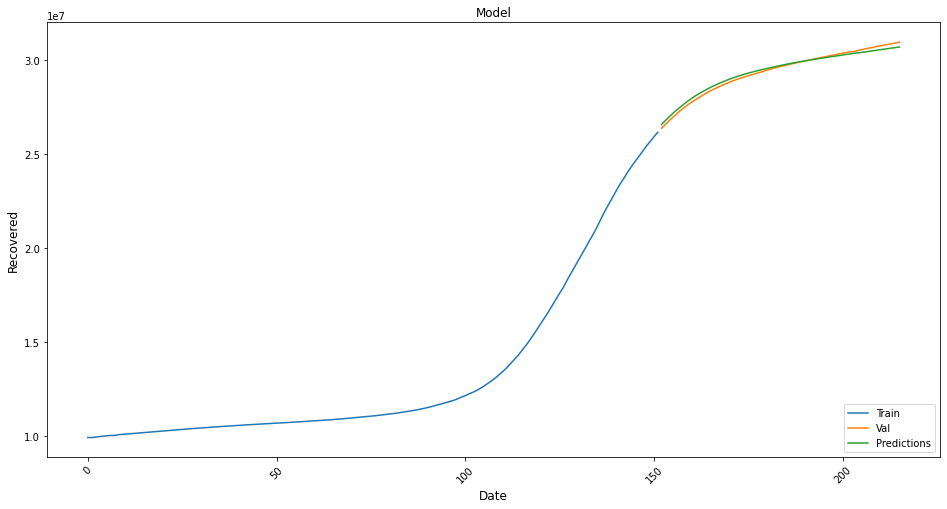

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Recovered', fontsize=12)
plt.plot(train['Recovered'])
plt.plot(valid[['Recovered', 'Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figzero.png', dpi=300)
plt.show()

In [29]:
valid

,Recovered,Predicted Cases
152,26390584,26595352.0
153,26597655,26804414.0
154,26795549,27001988.0
155,26984781,27189132.0
156,27159180,27366556.0
...,...,...
211,30820521,30605356.0
212,30857467,30633720.0
213,30896354,30661568.0
214,30933022,30689588.0


In [30]:
len(valid)

64

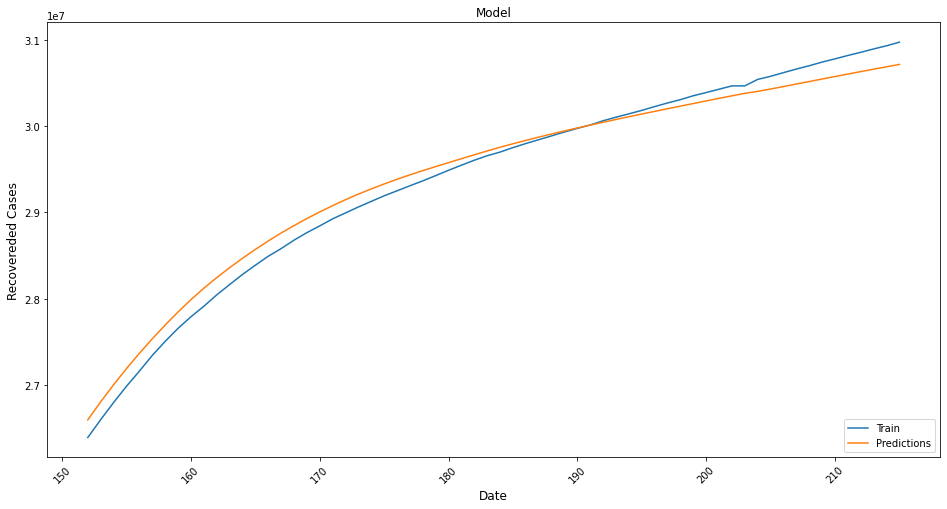

In [31]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Recovere Cases', fontsize=12)
plt.plot(valid)
plt.legend(['Train', 'Predictions'], loc='lower right')
#plt.savefig('/content/drive/My Drive/figone.png', dpi=300)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(valid['Recovered'], valid['Predicted Cases'])
print(score)

0.80809325878337
